In [1]:
# @title iAAA: Data Cleaning

from IPython.display import HTML

HTML('''
<div style="padding: 20px; background: linear-gradient(90deg, #a64ac9, #ff66b2); color: white; text-align: center; border-radius: 10px; font-size: 28px; font-weight: bold;">
  iAAA: Data Cleaning
</div>
''')

### 📝 Notebook Topic: *Data Cleaning*  
👨‍🏫 Lecturer: *Masoud Kaviani*  
📅 Date: *[YYYY-MM-DD]*  

In [2]:
# @title Installing & Importing Libraries

from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #a64ac9, #ff66b2); color: white; font-size: 20px; font-weight: bold; border-radius: 8px; margin-top: 20px;">
  💻 Installing & Importing Libraries
</div>
''')

In [50]:
import numpy as np
import pandas as pd

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer

from scipy import stats


In [4]:
# @title Section 1: Diabetes Dataset
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 1: Diabetes Dataset
</div>
''')

In [5]:
data = pd.read_csv('pima-indians-diabetes.csv', names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

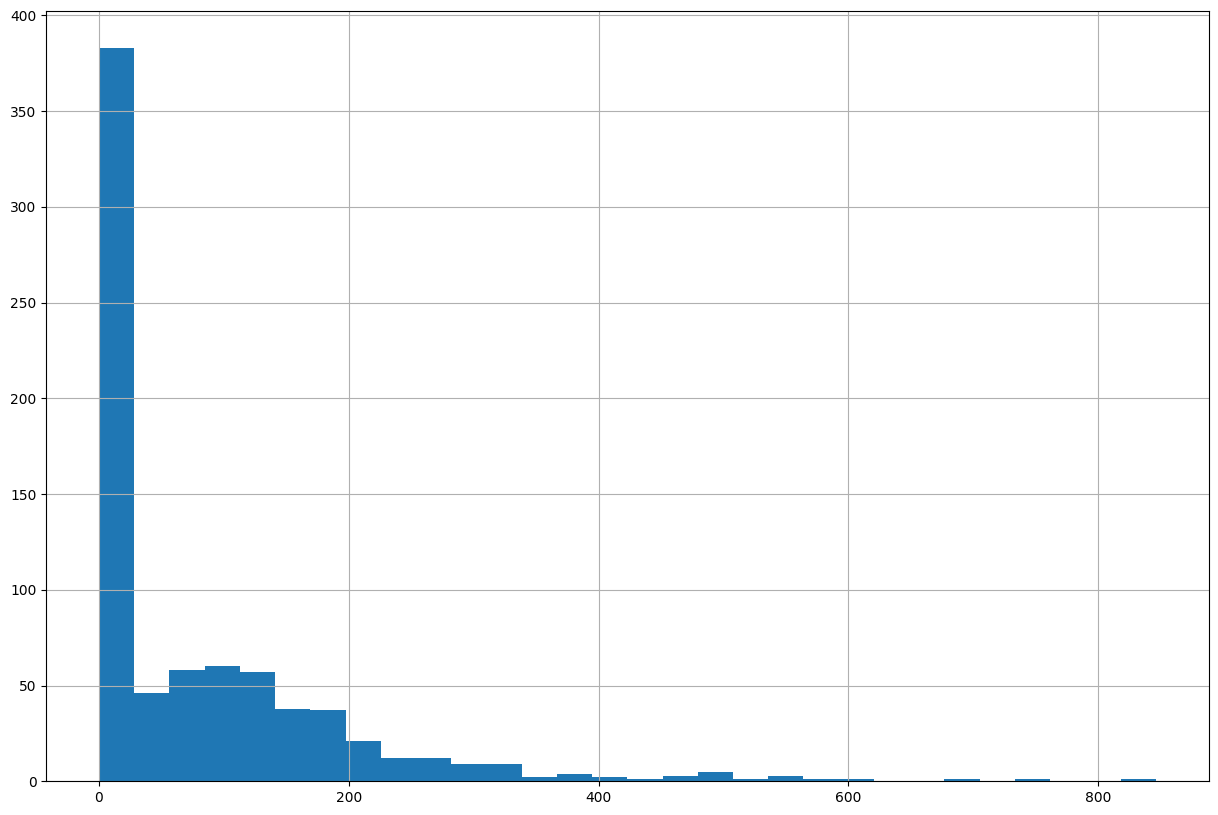

In [6]:
data['test'].hist(bins=30, figsize=(15, 10))

In [7]:
data.isnull().sum()

,0
preg,0
plas,0
pres,0
skin,0
test,0
mass,0
pedi,0
age,0
class,0


In [8]:
data.isna().sum()

,0
preg,0
plas,0
pres,0
skin,0
test,0
mass,0
pedi,0
age,0
class,0


In [9]:
skines = data[data['skin'] == 0]
skines

,preg,plas,pres,skin,test,mass,pedi,age,class
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [10]:
data[data['skin'] != 0]['skin'].mean()

np.float64(29.153419593345657)

In [11]:
skin_mean = data[data['skin'] != 0]['skin'].mean()

In [12]:
len(data)

768

In [13]:
data.replace({'skin': 0}, skin_mean, inplace=True)

In [14]:
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35.00000,0,33.6,0.627,50,1
1,1,85,66,29.00000,0,26.6,0.351,31,0
2,8,183,64,29.15342,0,23.3,0.672,32,1
3,1,89,66,23.00000,94,28.1,0.167,21,0
4,0,137,40,35.00000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.00000,180,32.9,0.171,63,0
764,2,122,70,27.00000,0,36.8,0.340,27,0
765,5,121,72,23.00000,112,26.2,0.245,30,0
766,1,126,60,29.15342,0,30.1,0.349,47,1


<Axes: >

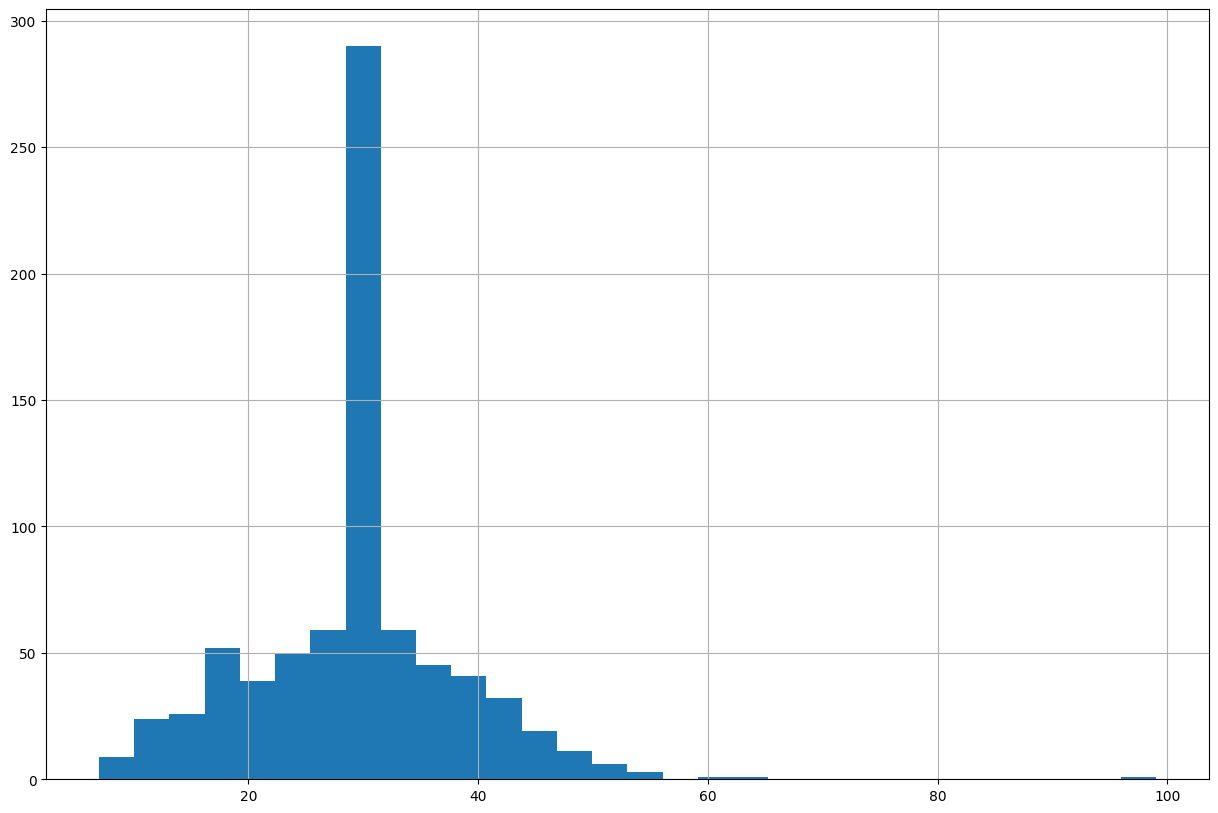

In [15]:
data['skin'].hist(bins=30, figsize=(15, 10))

In [16]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
test_mean = data[data['test'] != 0]['test'].mean()

In [18]:
data.replace({'test': 0}, test_mean, inplace=True)

In [19]:
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.00000,180.000000,32.9,0.171,63,0
764,2,122,70,27.00000,155.548223,36.8,0.340,27,0
765,5,121,72,23.00000,112.000000,26.2,0.245,30,0
766,1,126,60,29.15342,155.548223,30.1,0.349,47,1


In [20]:
data = pd.read_csv('pima-indians-diabetes.csv', names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
data.replace({'test': 0, 'skin': 0}, np.nan, inplace=True)

In [22]:
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,NaN,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,NaN,NaN,30.1,0.349,47,1


In [24]:
imputer = KNNImputer(n_neighbors=3)
data = imputer.fit_transform(data)

In [25]:
type(data)

numpy.ndarray

In [26]:
imputer.transform([
    [1, 93, 70, 31.0, np.nan, 30.4, 0.315, 23]
])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNNImputer was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but KNNImputer is expecting 9 features as input.

In [27]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [28]:
print(data)

[[6.00000000e+00 1.48000000e+02 7.20000000e+01 3.50000000e+01
  1.25333333e+02 3.36000000e+01 6.27000000e-01 5.00000000e+01
  1.00000000e+00]
 [1.00000000e+00 8.50000000e+01 6.60000000e+01 2.90000000e+01
  6.66666667e+01 2.66000000e+01 3.51000000e-01 3.10000000e+01
  0.00000000e+00]
 [8.00000000e+00 1.83000000e+02 6.40000000e+01 3.00000000e+01
  1.95000000e+02 2.33000000e+01 6.72000000e-01 3.20000000e+01
  1.00000000e+00]
 [1.00000000e+00 8.90000000e+01 6.60000000e+01 2.30000000e+01
  9.40000000e+01 2.81000000e+01 1.67000000e-01 2.10000000e+01
  0.00000000e+00]
 [0.00000000e+00 1.37000000e+02 4.00000000e+01 3.50000000e+01
  1.68000000e+02 4.31000000e+01 2.28800000e+00 3.30000000e+01
  1.00000000e+00]
 [5.00000000e+00 1.16000000e+02 7.40000000e+01 1.83333333e+01
  1.09000000e+02 2.56000000e+01 2.01000000e-01 3.00000000e+01
  0.00000000e+00]
 [3.00000000e+00 7.80000000e+01 5.00000000e+01 3.20000000e+01
  8.80000000e+01 3.10000000e+01 2.48000000e-01 2.60000000e+01
  1.00000000e+00]
 [1.00

In [29]:
data = data[:, :-1]

In [30]:
data

array([[6.00000000e+00, 1.48000000e+02, 7.20000000e+01, 3.50000000e+01,
        1.25333333e+02, 3.36000000e+01, 6.27000000e-01, 5.00000000e+01],
       [1.00000000e+00, 8.50000000e+01, 6.60000000e+01, 2.90000000e+01,
        6.66666667e+01, 2.66000000e+01, 3.51000000e-01, 3.10000000e+01],
       [8.00000000e+00, 1.83000000e+02, 6.40000000e+01, 3.00000000e+01,
        1.95000000e+02, 2.33000000e+01, 6.72000000e-01, 3.20000000e+01],
       [1.00000000e+00, 8.90000000e+01, 6.60000000e+01, 2.30000000e+01,
        9.40000000e+01, 2.81000000e+01, 1.67000000e-01, 2.10000000e+01],
       [0.00000000e+00, 1.37000000e+02, 4.00000000e+01, 3.50000000e+01,
        1.68000000e+02, 4.31000000e+01, 2.28800000e+00, 3.30000000e+01],
       [5.00000000e+00, 1.16000000e+02, 7.40000000e+01, 1.83333333e+01,
        1.09000000e+02, 2.56000000e+01, 2.01000000e-01, 3.00000000e+01],
       [3.00000000e+00, 7.80000000e+01, 5.00000000e+01, 3.20000000e+01,
        8.80000000e+01, 3.10000000e+01, 2.48000000e-01, 2.

In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [33]:
data

array([[0.35294118, 0.74371859, 0.59016393, 0.30434783, 0.1338141 ,
        0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.23913043, 0.06330128,
        0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.25      , 0.21754808,
        0.34724292, 0.25362938, 0.18333333],
       [0.05882353, 0.44723618, 0.54098361, 0.17391304, 0.09615385,
        0.41877794, 0.03800171, 0.        ],
       [0.        , 0.68844221, 0.32786885, 0.30434783, 0.18509615,
        0.64232489, 0.94363792, 0.2       ],
       [0.29411765, 0.58291457, 0.60655738, 0.12318841, 0.11418269,
        0.38152012, 0.05251921, 0.15      ],
       [0.17647059, 0.3919598 , 0.40983607, 0.27173913, 0.08894231,
        0.46199702, 0.07258753, 0.08333333],
       [0.58823529, 0.57788945, 0.        , 0.25362319, 0.07451923,
        0.52608048, 0.02391119, 0.13333333],
       [0.11764706, 0.98994975, 0.57377049, 0.41304348, 0.63581731,
        0.45454545, 0.034158

In [35]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [36]:
data

array([[ 6.39947260e-01,  8.48323795e-01,  1.49640753e-01,
         6.25703208e-01, -2.69421175e-01,  2.04012771e-01,
         4.68491977e-01,  1.42599540e+00],
       [-8.44885053e-01, -1.12339636e+00, -1.60545747e-01,
        -4.42144760e-03, -8.50042043e-01, -6.84421946e-01,
        -3.65060778e-01, -1.90671905e-01],
       [ 1.23388019e+00,  1.94372388e+00, -2.63941247e-01,
         1.00599328e-01,  4.20066105e-01, -1.10325546e+00,
         6.04397318e-01, -1.05584152e-01],
       [-8.44885053e-01, -9.98207780e-01, -1.60545747e-01,
        -6.34546104e-01, -5.79525502e-01, -4.94043078e-01,
        -9.20762614e-01, -1.04154944e+00],
       [-1.14185152e+00,  5.04055196e-01, -1.50468724e+00,
         6.25703208e-01,  1.52848546e-01,  1.40974560e+00,
         5.48490910e+00, -2.04963989e-02],
       [ 3.42980797e-01, -1.53184856e-01,  2.53036252e-01,
        -1.12464306e+00, -4.31071303e-01, -8.11341192e-01,
        -8.18078579e-01, -2.75759658e-01],
       [-2.50952128e-01, -1.342476

In [38]:
norm = Normalizer()
data = norm.fit_transform(data)

In [39]:
data

array([[ 3.23625340e-01,  4.29002660e-01,  7.56742665e-02,
         3.16422034e-01, -1.36247977e-01,  1.03170537e-01,
         2.36919329e-01,  7.21134813e-01],
       [-4.60766647e-01, -6.12655617e-01, -8.75552539e-02,
        -2.41128136e-03, -4.63579063e-01, -3.73256461e-01,
        -1.99089604e-01, -1.03984860e-01],
       [ 4.61432755e-01,  7.26892185e-01, -9.87058045e-02,
         3.76210152e-02,  1.57091638e-01, -4.12583175e-01,
         2.26025770e-01, -3.94851839e-02],
       [-3.91754227e-01, -4.62846532e-01, -7.44414576e-02,
        -2.94224779e-01, -2.68712962e-01, -2.29076681e-01,
        -4.26936948e-01, -4.82943085e-01],
       [-1.89497384e-01,  8.36511049e-02, -2.49712237e-01,
         1.03839352e-01,  2.53661700e-02,  2.33956079e-01,
         9.10254889e-01, -3.40150528e-03],
       [ 1.96090100e-01, -8.75793454e-02,  1.44666712e-01,
        -6.42984598e-01, -2.46453492e-01, -4.63862632e-01,
        -4.67714554e-01, -1.57658211e-01],
       [-1.22479676e-01, -6.552089

In [40]:
np.sum(data[0]**2)

np.float64(0.9999999999999999)

In [42]:
binarizer = Binarizer(threshold=0.0)
data_b = binarizer.fit_transform(data)

In [43]:
data_b

array([[1., 1., 1., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 1.],
       [1., 1., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 0., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 0., 1., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 1., 1., 0., 1., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 0.],
       [1., 0., 1., 0., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 0., 0., 0., 0.],
       [1., 1., 

In [44]:
np.concatenate((data, data_b), axis=1)

array([[ 3.23625340e-01,  4.29002660e-01,  7.56742665e-02,
         3.16422034e-01, -1.36247977e-01,  1.03170537e-01,
         2.36919329e-01,  7.21134813e-01,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-4.60766647e-01, -6.12655617e-01, -8.75552539e-02,
        -2.41128136e-03, -4.63579063e-01, -3.73256461e-01,
        -1.99089604e-01, -1.03984860e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.61432755e-01,  7.26892185e-01, -9.87058045e-02,
         3.76210152e-02,  1.57091638e-01, -4.12583175e-01,
         2.26025770e-01, -3.94851839e-02,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [-3.91754227e-01, -4.62846532e

In [45]:
# @title Section 2: Flights Dataset
from IPython.display import HTML

HTML('''
<div style="padding: 12px; background: linear-gradient(to right, #c471ed, #f7797d); color: white; font-size: 22px; border-radius: 8px; margin-top: 20px;">
  📘 Section 2: Flights Dataset
</div>
''')

In [47]:
data = pd.read_csv('flights.csv')
data.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [48]:
data['arr_delay'].mean()

np.float64(6.89537675731489)

In [49]:
data['arr_delay']

,arr_delay
0,11.0
1,20.0
2,33.0
3,-18.0
4,-25.0
...,...
336771,NaN
336772,NaN
336773,NaN
336774,NaN


In [51]:
stats.trim_mean(data['arr_delay'], 0.1)

np.float64(0.9612355338465307)

In [52]:
data['arr_delay'].median()

-5.0

In [53]:
data['arr_delay'].mode()

,arr_delay
0,-13.0


In [54]:
data['arr_delay'].var()

1992.130727102053

In [55]:
data['arr_delay'].std()

44.63329169019526

<Axes: >

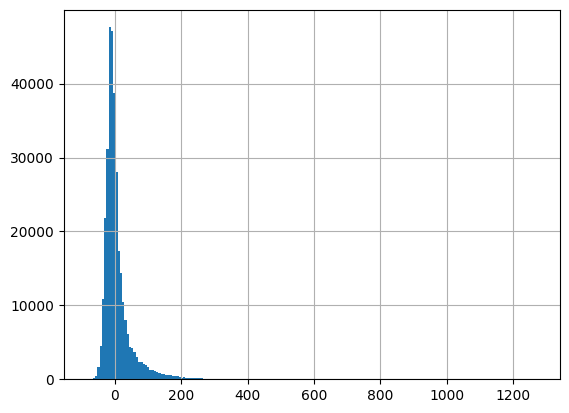

In [56]:
data['arr_delay'].hist(bins=200)

<Axes: >

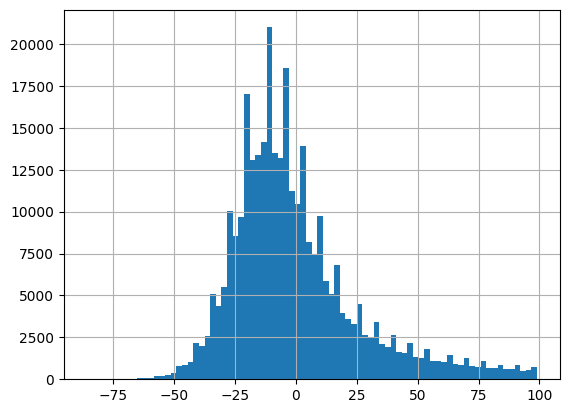

In [57]:
data['arr_delay'][data['arr_delay'] < 100].hist(bins=80)

<Axes: >

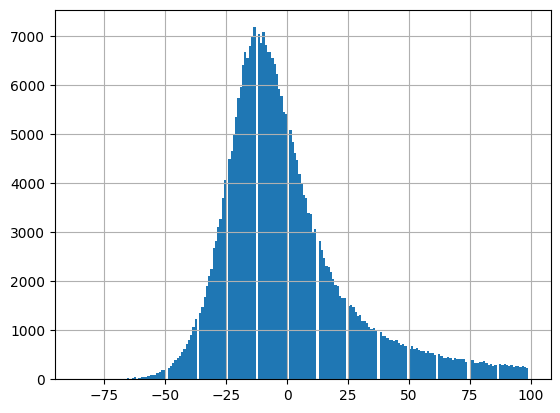

In [58]:
data['arr_delay'][data['arr_delay'] < 100].hist(bins=200)

<Axes: >

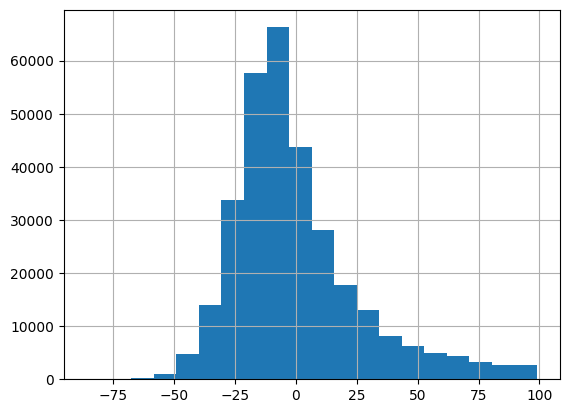

In [59]:
data['arr_delay'][data['arr_delay'] < 100].hist(bins=20)

In [60]:
data['arr_delay'].std()

44.63329169019526

In [61]:
data['arr_delay'].mean() - (3 * data['arr_delay'].std())

np.float64(-127.00449831327089)

In [62]:
data['arr_delay'].mean() + (3 * data['arr_delay'].std())

np.float64(140.79525182790067)

In [63]:
data['arr_delay'].skew()

np.float64(3.7168174804571863)

In [64]:
data['arr_delay'].kurtosis()

np.float64(29.233043998766775)

In [67]:
data.corr(numeric_only=True)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
id,1.000000,NaN,0.071779,0.087852,0.002172,0.004076,0.049713,-0.024680,-0.013373,0.018613,0.002676,-0.032866,0.012526,0.003150,0.022619
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.071779,NaN,1.000000,0.002942,-0.003932,-0.004573,-0.020057,-0.002520,-0.004173,-0.017382,-0.000834,0.010924,0.021636,-0.005227,0.015528
day,0.087852,NaN,0.002942,1.000000,-0.000467,-0.000014,0.000420,-0.005537,-0.002403,-0.000319,-0.001791,0.002236,0.003041,-0.000055,0.000987
dep_time,0.002172,NaN,-0.003932,-0.000467,1.000000,0.954617,0.260231,0.660779,0.784682,0.232306,0.041957,-0.014619,-0.013998,0.953306,0.091577
sched_dep_time,0.004076,NaN,-0.004573,-0.000014,0.954617,1.000000,0.198887,0.642680,0.783342,0.173896,0.036495,-0.015532,-0.017995,0.999148,0.082960
dep_delay,0.049713,NaN,-0.020057,0.000420,0.260231,0.198887,1.000000,0.028729,0.160488,0.914803,0.054734,-0.022405,-0.021671,0.198226,0.028441
arr_time,-0.024680,NaN,-0.002520,-0.005537,0.660779,0.642680,0.028729,1.000000,0.788997,0.024482,0.025042,0.054296,0.046991,0.642651,0.040969
sched_arr_time,-0.013373,NaN,-0.004173,-0.002403,0.784682,0.783342,0.160488,0.788997,1.000000,0.133261,0.021594,0.078918,0.068726,0.783283,0.050321
arr_delay,0.018613,NaN,-0.017382,-0.000319,0.232306,0.173896,0.914803,0.024482,0.133261,1.000000,0.072862,-0.035297,-0.061868,0.173456,0.021522


In [68]:
data.corr(numeric_only=True)['arr_delay']

,arr_delay
id,0.018613
year,NaN
month,-0.017382
day,-0.000319
dep_time,0.232306
sched_dep_time,0.173896
dep_delay,0.914803
arr_time,0.024482
sched_arr_time,0.133261
arr_delay,1.000000


In [69]:
# @title 🎓End of Notebook – Thank You!
from IPython.display import HTML

HTML('''
<div style="margin-top: 40px; padding: 16px; background: linear-gradient(90deg, #ff66b2, #a64ac9); color: white; text-align: center; border-radius: 10px; font-size: 18px;">
  🎓 <strong>End of Notebook – Thank You!</strong>
</div>
''')